In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img_2d = np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]])

In [4]:
img = Image.open('354633913_1668733213638316_62138375554710082_n.jpg')
img_2d = np.array(img)

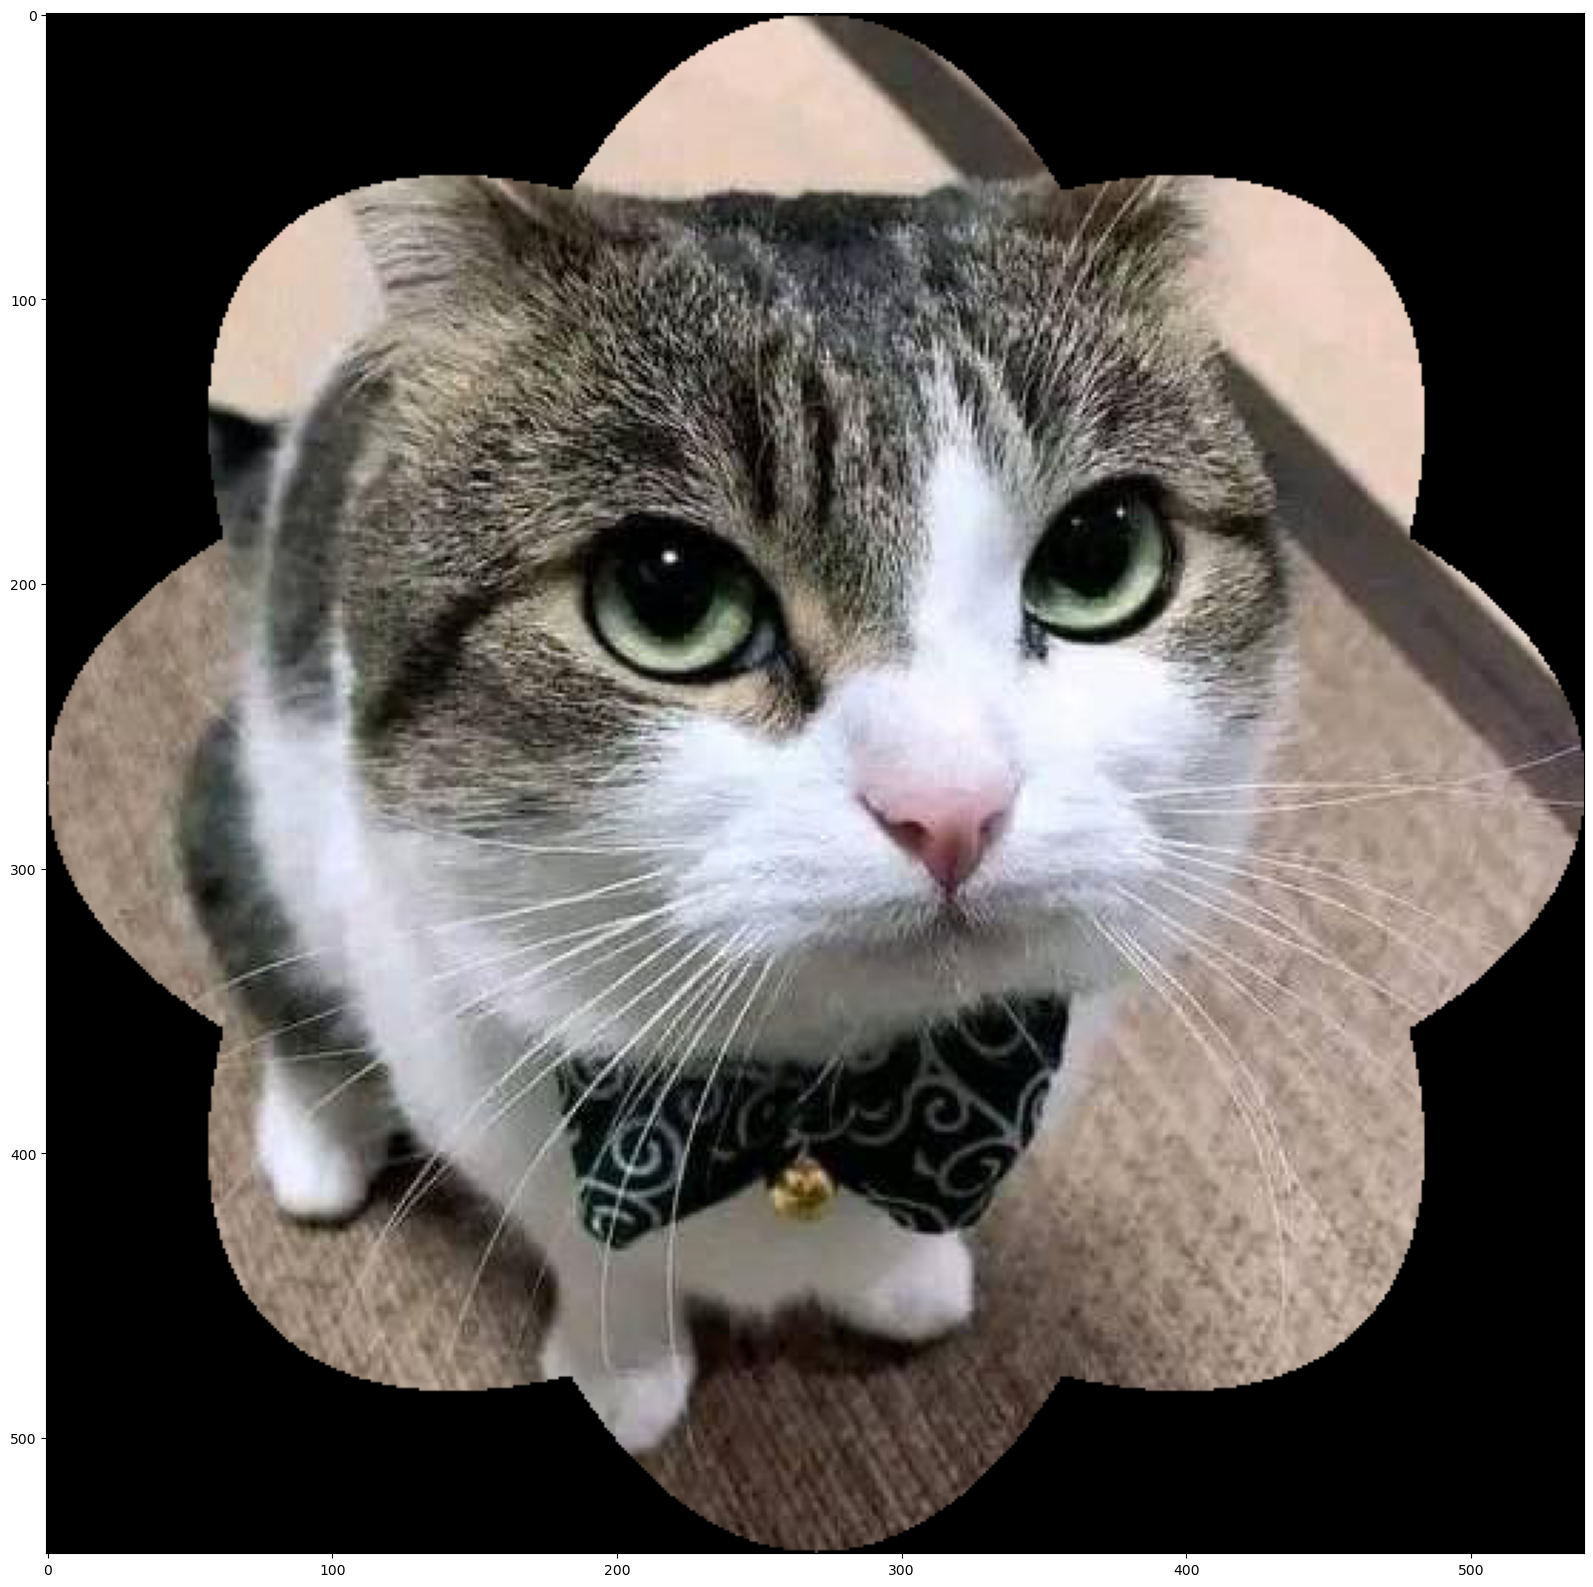

In [10]:
def elliptical_crop(img_2d):
    h, w = img_2d.shape[:2]
    center = (h // 2, w // 2)

    # for 1x1 square
    a = 0.25
    b = -0.5
    
    # for h x w square
    new_a = a * h
    new_b = b * w
    
    Y, X = np.ogrid[:h, :w]
    
    const_1 = 1 / new_a**2 + 1 / new_b**2
    const_2 = 1 / new_a**2 - 1 / new_b**2
    
    mask_l = const_1 * ((X - center[1])**2 + (Y - center[0])**2) - const_2 * 2 * (X - center[1]) * (Y - center[0]) > 2
    mask_r = const_1 * ((X - center[1])**2 + (Y - center[0])**2) + const_2 * 2 * (X - center[1]) * (Y - center[0]) > 2
    
    
    mask_u = (X - center[1])**2 / new_a**2 + (Y - center[0])**2 / new_b**2 > 1
    mask_d = (X - center[1])**2 / new_b**2 + (Y - center[0])**2 / new_a**2 > 1
    
    
    new_img_2d = img_2d.copy()
    new_img_2d[mask_l & mask_r & mask_u & mask_d] = 0
    
    return new_img_2d
plt.figure(figsize=(20,20))
plt.imshow(elliptical_crop(img_2d))
plt.imsave('elliptical_crop.png', elliptical_crop(img_2d))

In [6]:
print(grayscale(img_2d))

NameError: name 'grayscale' is not defined